# **Principal Component Analysis - PCA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [ ]:
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
print(wine["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

## Normalização StandardScaler

Padronizar dados significa ajustá-los para ter média zero e desvio padrão um. Essa técnica é útil quando os dados são aproximadamente normais.

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


Text(0, 0.5, 'segundo componente principal')

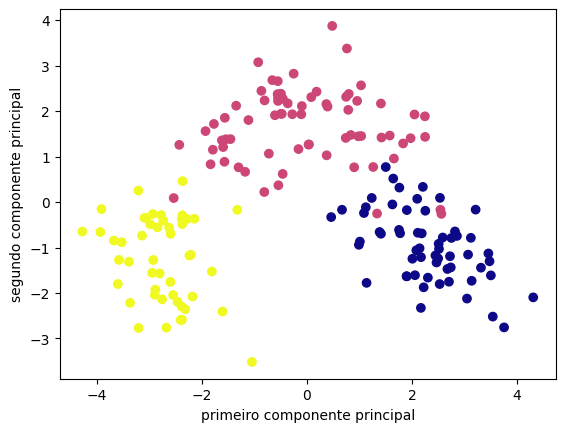

In [ ]:
Dados = pd.DataFrame(wine['data'],columns = wine["feature_names"])

scalar = StandardScaler()
scalar.fit(Dados)

normalizado = scalar.transform(Dados)
print(normalizado)

pca = PCA(n_components = 2)
pca.fit(normalizado)

x_dados = pca.transform(normalizado)
x_dados.shape

plt.scatter(x_dados[:,0], x_dados[:,1], c= wine["target"], cmap= "plasma")
plt.xlabel("primeiro componente principal")
plt.ylabel("segundo componente principal")

In [ ]:
#Dados.columns
Dados.shape

(178, 13)

In [ ]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

<Axes: >

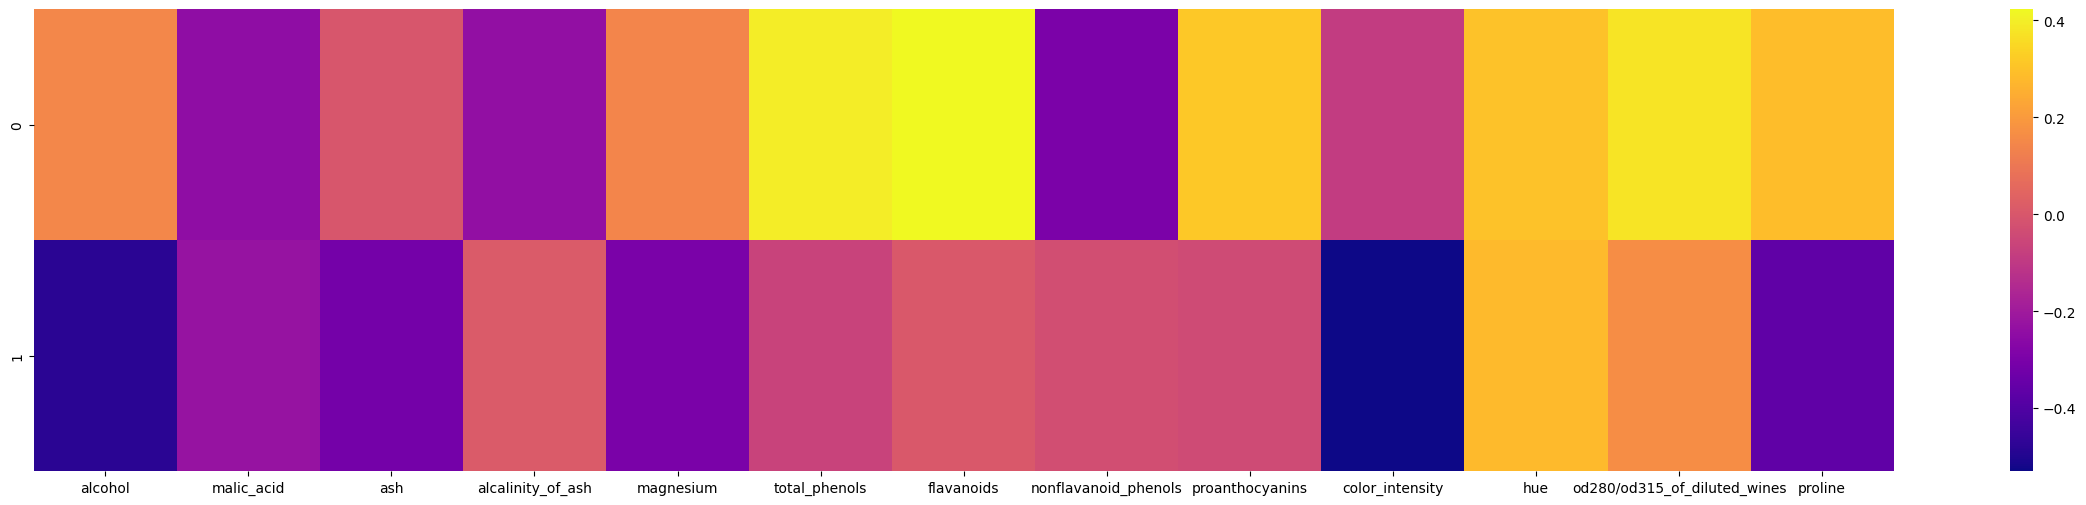

In [ ]:
dados_comp = pd.DataFrame(pca.components_,columns=wine["feature_names"])

plt.figure(figsize = (30,6))
sns.heatmap(dados_comp, cmap="plasma")

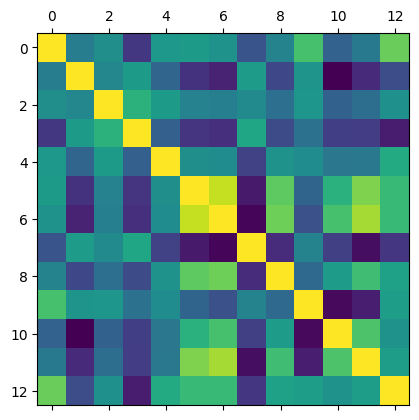

In [ ]:
plt.matshow(Dados.corr())

## Extras

In [ ]:
sns.pairplot(Dados)

### Verificando a distribuição

In [ ]:
plt.figure(figsize=(12, 8))
for coluna in Dados.columns:
    plt.subplot(3, 5, Dados.columns.get_loc(coluna) + 1)
    sns.histplot(Dados[coluna], bins=20, kde=True, color='blue')
    plt.title(f'Histograma de {coluna}')

plt.tight_layout()
plt.show()

### Verificando a presença de outliers

In [ ]:
for coluna in Dados.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=Dados[coluna], color='blue')
    plt.xlabel(coluna)
    plt.title(f'Boxplot de {coluna}')
    plt.show()


# Outras n

```
# Isto está formatado como código
```

ormalizações



In [ ]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer

## Normalização Robustscaler

Padroniza os dados usando estatísticas robustas para evitar a influência de outliers. Usada quando os dados contêm outliers significativos.

[[ 0.8973384  -0.10472973  0.20143885 ...  0.22222222  0.92494929
   0.80804954]
 [ 0.11406844 -0.05743243 -0.63309353 ...  0.25185185  0.5030426
   0.77708978]
 [ 0.08365019  0.33445946  0.89208633 ...  0.19259259  0.31643002
   1.05572755]
 ...
 [ 0.16730038  1.63175676 -0.28776978 ... -1.11111111 -0.98985801
   0.33333333]
 [ 0.09125475  0.48986486  0.02877698 ... -1.08148148 -0.94117647
   0.34365325]
 [ 0.82129278  1.51013514  1.09352518 ... -1.05185185 -0.95740365
  -0.23426213]]


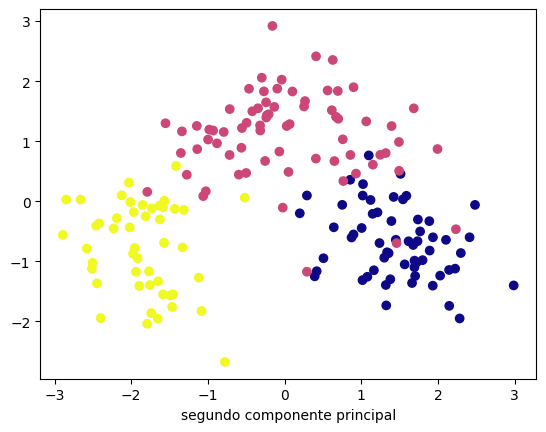

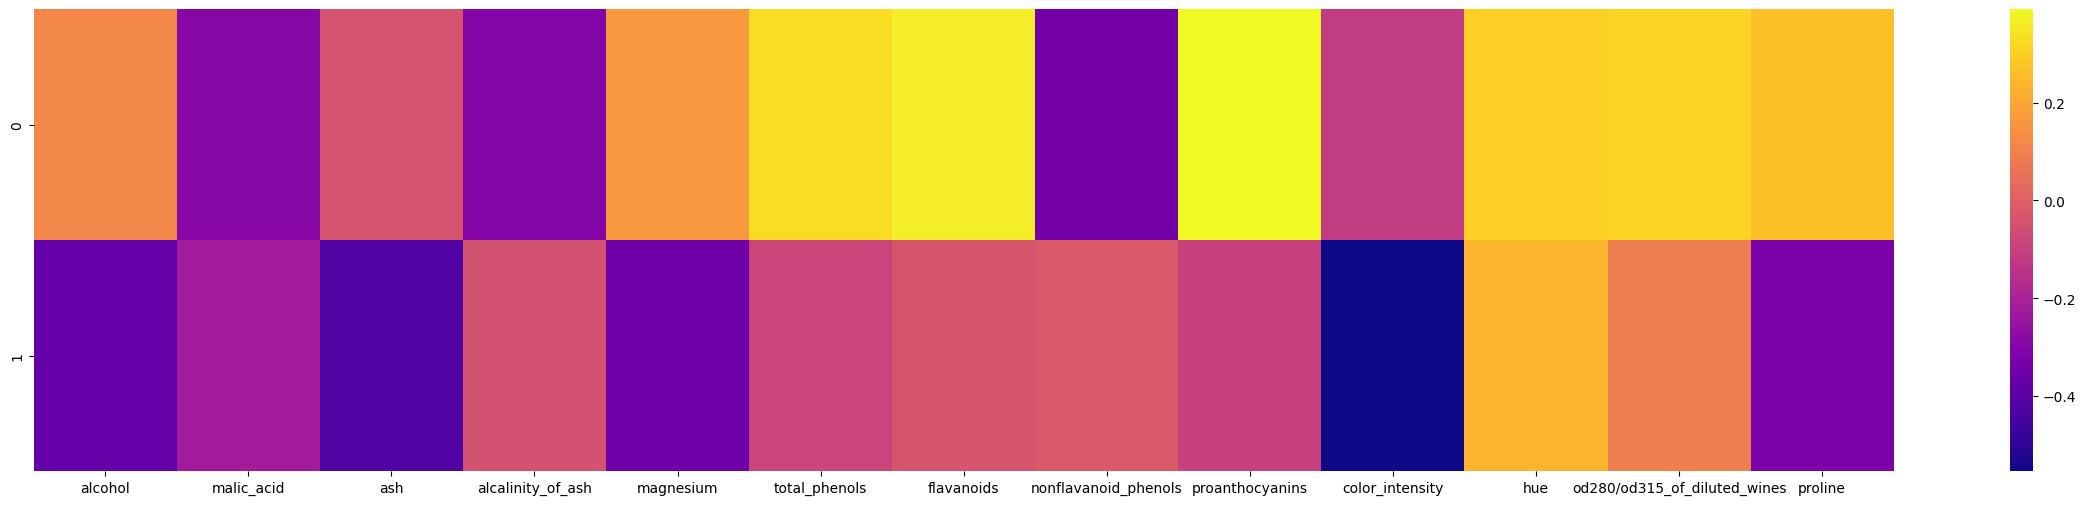

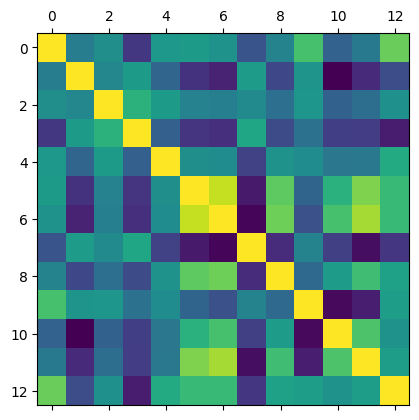

In [ ]:
Dados = pd.DataFrame(wine['data'],columns = wine["feature_names"])

scalar = RobustScaler()
scalar.fit(Dados)

normalizado = scalar.transform(Dados)
print(normalizado)

pca = PCA(n_components = 2)
pca.fit(normalizado)

x_dados = pca.transform(normalizado)
x_dados.shape

plt.scatter(x_dados[:,0], x_dados[:,1], c= wine["target"], cmap= "plasma")
plt.xlabel("primeiro componente principal")
plt.ylabel("segundo componente principal")


pca.components_

dados_comp = pd.DataFrame(pca.components_,columns=wine["feature_names"])

plt.figure(figsize = (30,6))
sns.heatmap(dados_comp, cmap="plasma")

plt.matshow(Dados.corr())

## Normalização MinMaxScaler

Redimensiona os dados para um intervalo, geralmente [0, 1].


[[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.66403162 0.73796791 ... 0.10569106 0.12087912 0.20114123]]


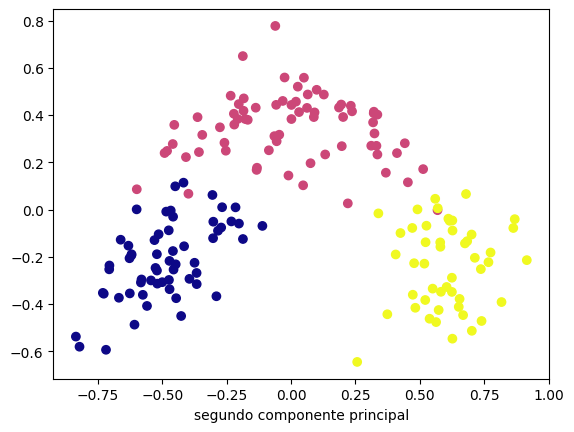

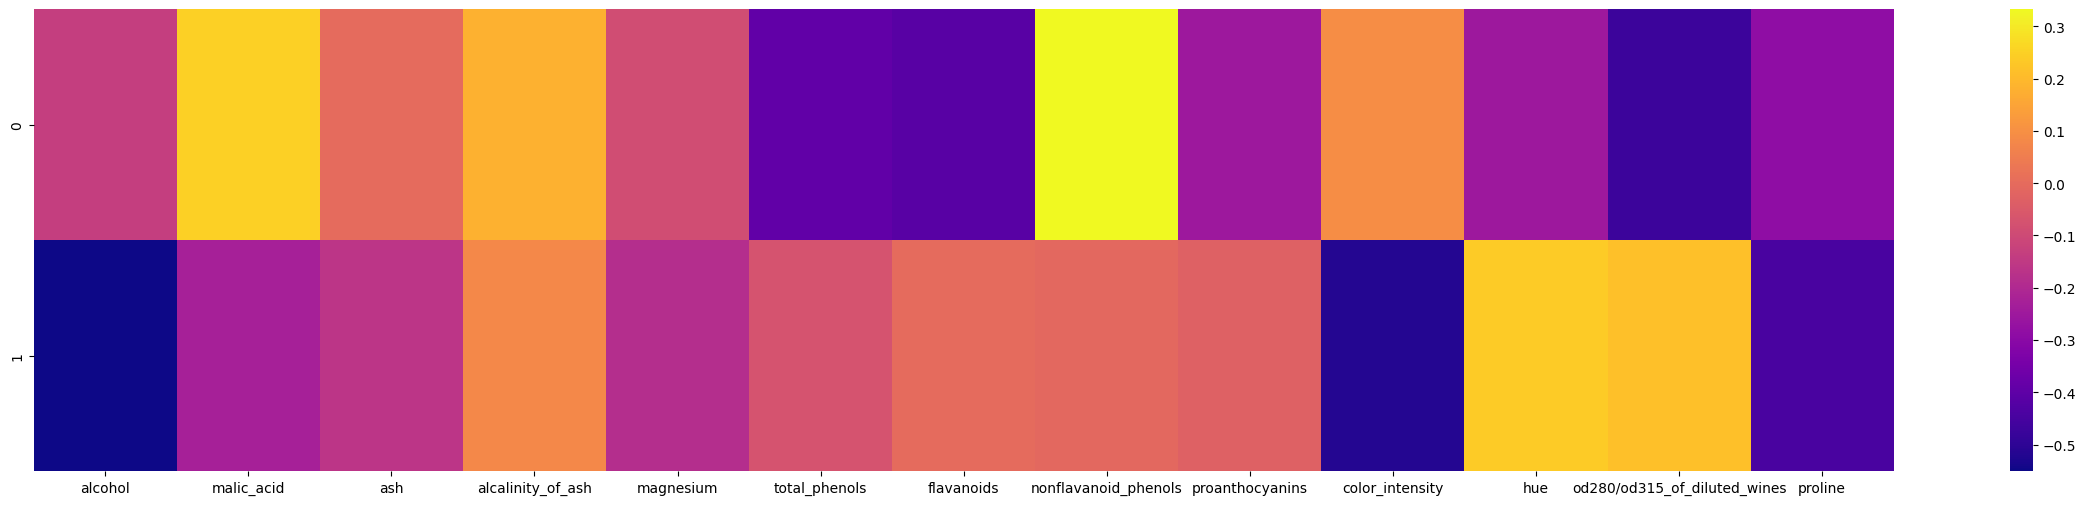

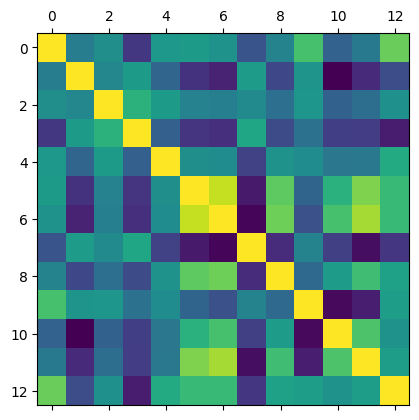

In [ ]:
Dados = pd.DataFrame(wine['data'],columns = wine["feature_names"])

scalar = MinMaxScaler()
scalar.fit(Dados)

normalizado = scalar.transform(Dados)
print(normalizado)

pca = PCA(n_components = 2)
pca.fit(normalizado)

x_dados = pca.transform(normalizado)
x_dados.shape

plt.scatter(x_dados[:,0], x_dados[:,1], c= wine["target"], cmap= "plasma")
plt.xlabel("primeiro componente principal")
plt.ylabel("segundo componente principal")


pca.components_

dados_comp = pd.DataFrame(pca.components_,columns=wine["feature_names"])

plt.figure(figsize = (30,6))
sns.heatmap(dados_comp, cmap="plasma")

plt.matshow(Dados.corr())

## Normalização Normalizer

Normaliza cada linha para ter norma unitária.

[[1.32644724e-02 1.59397384e-03 2.26512072e-03 ... 9.69434383e-04
  3.65402190e-03 9.92738094e-01]
 [1.25128005e-02 1.68733218e-03 2.02859038e-03 ... 9.95336401e-04
  3.22299406e-03 9.95336401e-01]
 [1.10630135e-02 1.98394467e-03 2.24454758e-03 ... 8.65874158e-04
  2.66487484e-03 9.96175609e-01]
 ...
 [1.57227449e-02 5.07108879e-03 2.67772446e-03 ... 6.99051960e-04
  1.84834078e-03 9.89336248e-01]
 [1.55136606e-02 3.05090212e-03 2.79175213e-03 ... 7.06772691e-04
  1.90828627e-03 9.89481768e-01]
 [2.48340486e-02 7.20591644e-03 4.81566123e-03 ... 1.07209976e-03
  2.81206495e-03 9.84222734e-01]]


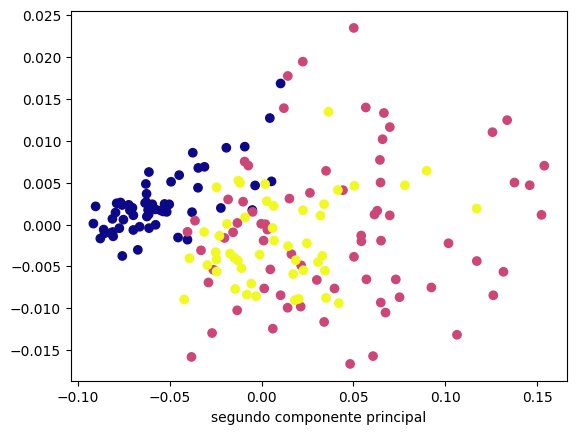

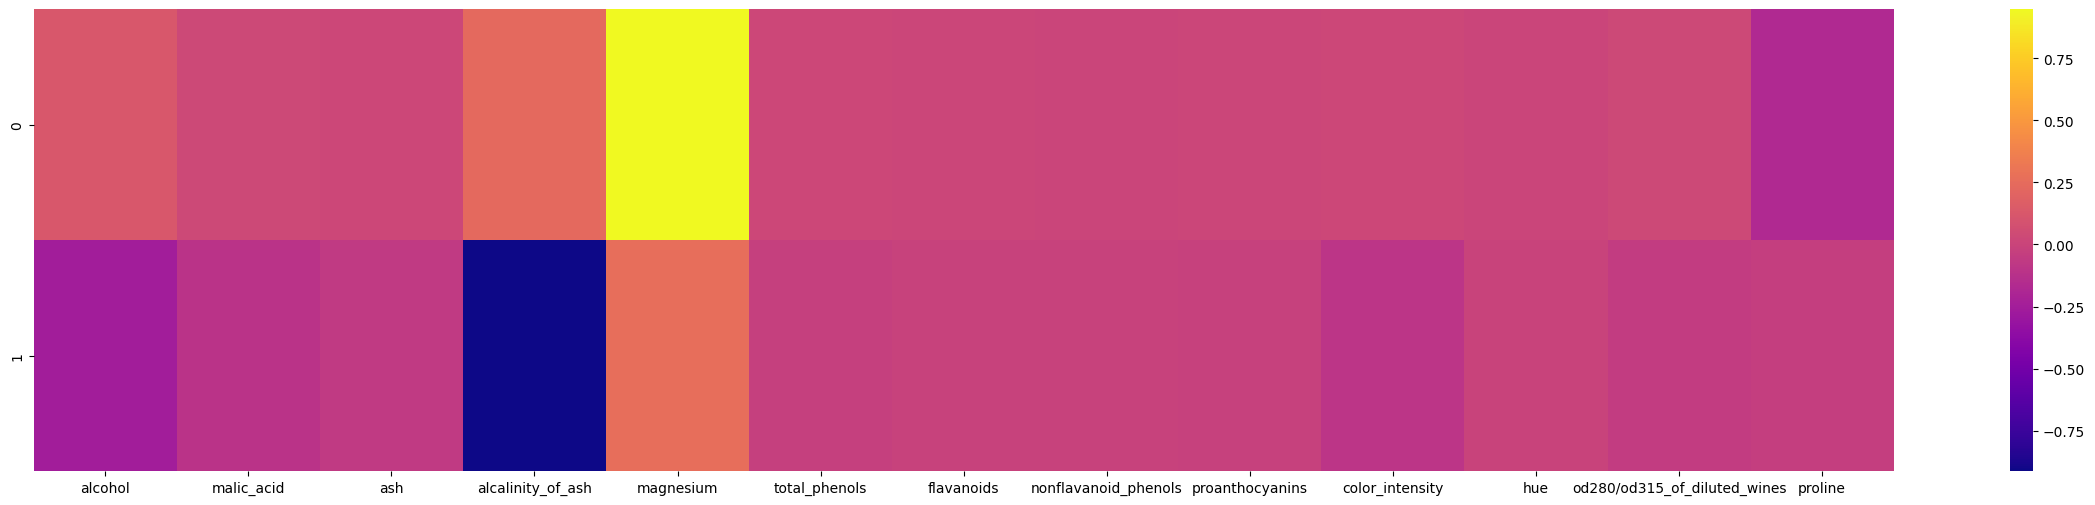

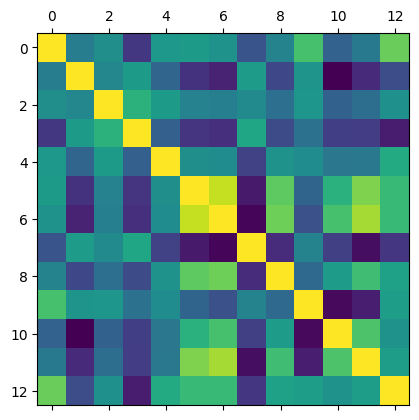

In [ ]:
Dados = pd.DataFrame(wine['data'],columns = wine["feature_names"])

scalar = Normalizer()
scalar.fit(Dados)

normalizado = scalar.transform(Dados)
print(normalizado)

pca = PCA(n_components = 2)
pca.fit(normalizado)

x_dados = pca.transform(normalizado)
x_dados.shape

plt.scatter(x_dados[:,0], x_dados[:,1], c= wine["target"], cmap= "plasma")
plt.xlabel("primeiro componente principal")
plt.ylabel("segundo componente principal")


pca.components_

dados_comp = pd.DataFrame(pca.components_,columns=wine["feature_names"])

plt.figure(figsize = (30,6))
sns.heatmap(dados_comp, cmap="plasma")

plt.matshow(Dados.corr())